In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# ambil dataset Travel Reviews (id: 484)
travel_reviews = fetch_ucirepo(id=484)

# pisahkan fitur dan target
X = travel_reviews.data.features
y = travel_reviews.data.targets

# gabung jadi satu DataFrame
df = pd.concat([X, y], axis=1)

In [3]:
# mapping nama kolom ke deskripsinya
desc_map = {
    "Category 1": "Art galleries",
    "Category 2": "Dance clubs",
    "Category 3": "Juice bars",
    "Category 4": "Restaurants",
    "Category 5": "Museums",
    "Category 6": "Resorts",
    "Category 7": "Parks/picnic spots",
    "Category 8": "Beaches",
    "Category 9": "Theaters",
    "Category 10": "Religious institutions",
}

# ambil hanya kolom kategori (hindari 'User ID' atau kolom target lain)
category_cols = [c for c in df.columns if c.startswith("Category")]

# salinan khusus untuk plotting dengan nama kolom = deskripsi
df_plot = df[category_cols].rename(columns=desc_map)

# kalau mau lihat preview (nama kolom sudah deskripsi)
df_plot.head()

,Art galleries,Dance clubs,Juice bars,Restaurants,Museums,Resorts,Parks/picnic spots,Beaches,Theaters,Religious institutions
0,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


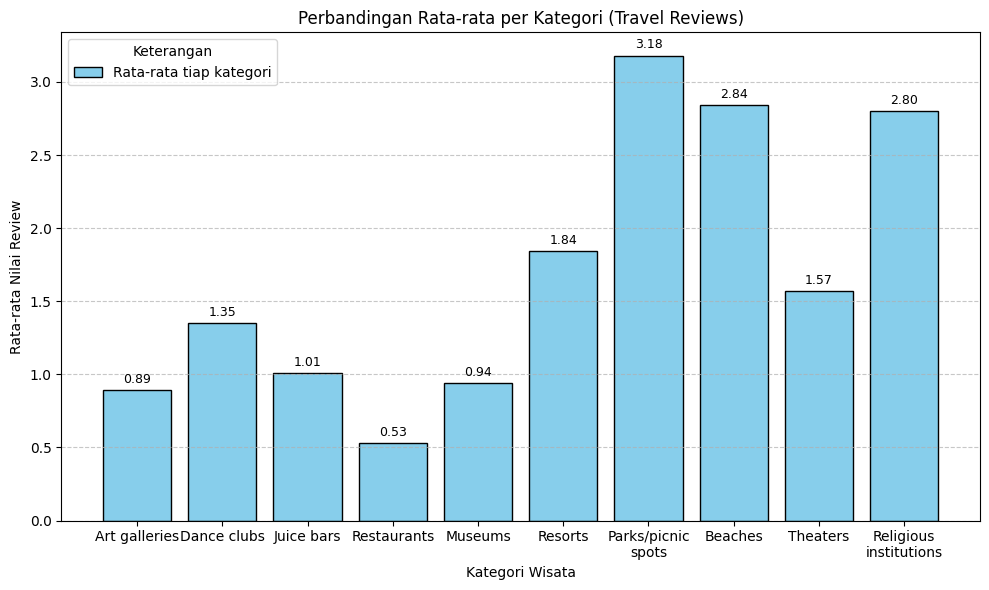

In [4]:
import matplotlib.pyplot as plt
import textwrap

# Hitung rata-rata per kategori
mean_values = df_plot.mean().round(2)

# Bungkus label biar gak kepanjangan
wrapped_labels = [textwrap.fill(lbl, width=16) for lbl in mean_values.index]

# Buat bar chart
plt.figure(figsize=(10, 6))
plt.bar(wrapped_labels, mean_values.values, color='skyblue', edgecolor='black', label='Rata-rata tiap kategori')

# Tambahkan legend (keterangan)
plt.legend(title="Keterangan", loc='upper left')

# Tambahkan label dan judul
plt.title("Perbandingan Rata-rata per Kategori (Travel Reviews)")
plt.xlabel("Kategori Wisata")
plt.ylabel("Rata-rata Nilai Review")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan nilai di atas batang
for i, val in enumerate(mean_values.values):
    plt.text(i, val + 0.05, f"{val:.2f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

Art galleries             0
Dance clubs               0
Juice bars                0
Restaurants               0
Museums                   0
Resorts                   0
Parks/picnic spots        0
Beaches                   0
Theaters                  0
Religious institutions    0
dtype: int64

--- Daftar Kategori dengan Missing Value ---
Series([], dtype: int64)


C:\Users\asus\AppData\Local\Temp\ipykernel_10708\3481743630.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(wrapped, rotation=0, ha='center')


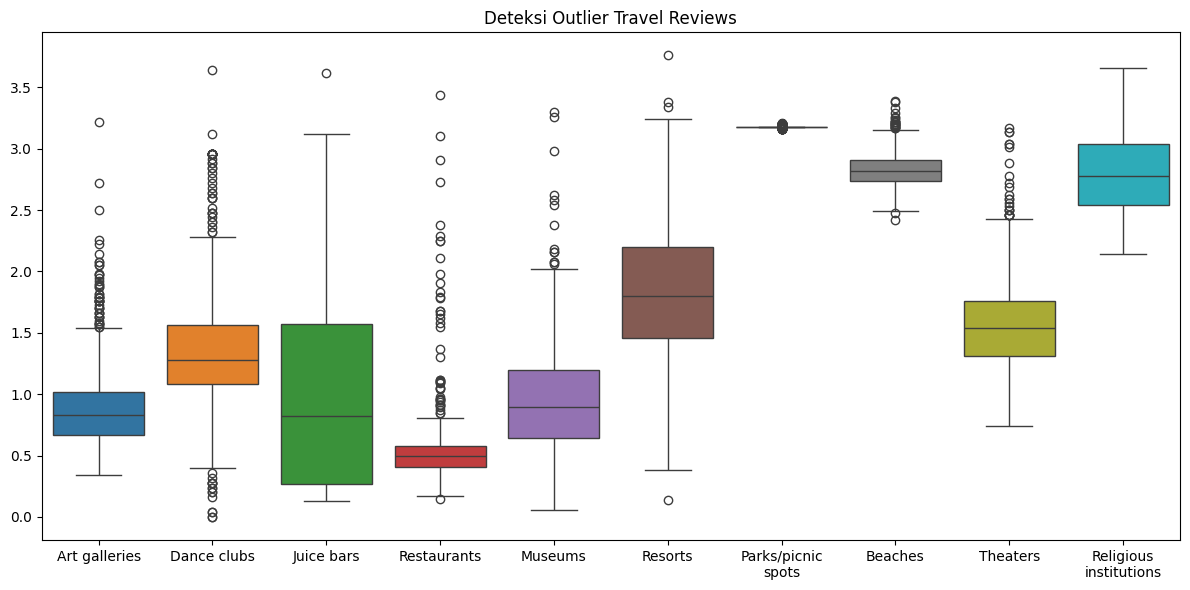

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# ====== Cek jumlah missing value di setiap kategori ======
missing_per_col = df_plot.isnull().sum()
print(missing_per_col)

print("\n--- Daftar Kategori dengan Missing Value ---")
print(missing_per_col[missing_per_col > 0])

# ====== Buat boxplot dengan label kategori versi deskripsi ======
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df_plot)
plt.title("Deteksi Outlier Travel Reviews")

# Bungkus label biar gak kepanjangan dan rapi
wrapped = [textwrap.fill(lbl, width=16) for lbl in df_plot.columns]
ax.set_xticklabels(wrapped, rotation=0, ha='center')

plt.tight_layout()
plt.show()

In [6]:
# Cek nilai unik di setiap kolom (pakai nama deskripsi)
for col in df_plot.columns:
    unique_vals = df_plot[col].unique()[:10]  # tampilkan 10 nilai unik pertama
    print(f"{col}: {unique_vals}")

Art galleries: [0.93 1.02 1.22 0.45 0.51 0.99 0.9  0.74 1.12 0.7 ]
Dance clubs: [1.8  2.2  0.8  1.2  1.28 1.36 1.4  1.76 1.   2.96]
Juice bars: [2.29 2.66 0.54 0.29 1.18 0.72 0.26 0.22 1.04 0.7 ]
Restaurants: [0.62 0.64 0.53 0.57 0.27 0.32 0.41 0.26 0.75 0.38]
Museums: [0.8  1.42 0.24 0.46 1.54 0.74 0.86 0.82 1.5  1.66]
Resorts: [2.42 3.18 1.54 1.52 2.02 1.26 1.58 1.5  2.14 2.76]
Parks/picnic spots: [3.19 3.21 3.18 3.17 3.2  3.16]
Beaches: [2.79 2.63 2.8  2.96 2.78 2.89 2.66 2.81 2.82 2.93]
Theaters: [1.82 1.86 1.31 1.57 1.18 1.66 1.22 1.54 1.41 2.24]
Religious institutions: [2.42 2.32 2.5  2.86 2.54 3.66 3.22 2.88 3.12 2.62]


In [7]:
# ====== Hitung IQR (Interquartile Range) ======
Q1 = df_plot.quantile(0.25)
Q3 = df_plot.quantile(0.75)
IQR = Q3 - Q1

# ====== Buat kondisi outlier ======
outlier_condition = (df_plot < (Q1 - 1.5 * IQR)) | (df_plot > (Q3 + 1.5 * IQR))

# ====== Hitung jumlah outlier per kolom ======
print("Jumlah Outlier per Kategori (berdasarkan deskripsi):")
print(outlier_condition.sum().sort_values(ascending=False))

Jumlah Outlier per Kategori (berdasarkan deskripsi):
Parks/picnic spots        399
Dance clubs                54
Art galleries              47
Restaurants                45
Beaches                    24
Theaters                   23
Museums                    13
Resorts                     4
Juice bars                  1
Religious institutions      0
dtype: int64


In [8]:
# Statistik deskriptif dasar TANPA menghapus outlier
desc = df_plot.describe()
print("Statistik Deskriptif Dasar (Tanpa Penanganan Outlier):")

# (Opsional) biar tampilan lebih rapi
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)  # biar angka ga kepanjangan
desc_rounded = desc.round(2)
display(desc_rounded)

Statistik Deskriptif Dasar (Tanpa Penanganan Outlier):


,Art galleries,Dance clubs,Juice bars,Restaurants,Museums,Resorts,Parks/picnic spots,Beaches,Theaters,Religious institutions
count,980.00,980.00,980.00,980.00,980.00,980.00,980.00,980.00,980.00,980.00
mean,0.89,1.35,1.01,0.53,0.94,1.84,3.18,2.84,1.57,2.80
std,0.33,0.48,0.79,0.28,0.44,0.54,0.01,0.14,0.36,0.32
min,0.34,0.00,0.13,0.15,0.06,0.14,3.16,2.42,0.74,2.14
25%,0.67,1.08,0.27,0.41,0.64,1.46,3.18,2.74,1.31,2.54
50%,0.83,1.28,0.82,0.50,0.90,1.80,3.18,2.82,1.54,2.78
75%,1.02,1.56,1.57,0.58,1.20,2.20,3.18,2.91,1.76,3.04
max,3.22,3.64,3.62,3.44,3.30,3.76,3.21,3.39,3.17,3.66


In [9]:
# Info struktur DataFrame utama
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Art galleries           980 non-null    float64
 1   Dance clubs             980 non-null    float64
 2   Juice bars              980 non-null    float64
 3   Restaurants             980 non-null    float64
 4   Museums                 980 non-null    float64
 5   Resorts                 980 non-null    float64
 6   Parks/picnic spots      980 non-null    float64
 7   Beaches                 980 non-null    float64
 8   Theaters                980 non-null    float64
 9   Religious institutions  980 non-null    float64
dtypes: float64(10)
memory usage: 76.7 KB


In [10]:
# Nilai rata-rata & median (tanpa menghapus outlier)
print("\nRata-rata per kategori:")
print(df_plot.mean().round(2))

print("\nMedian per kategori:")
print(df_plot.median().round(2)) #round digunakan untuk membulantkan hasil menjadi 2 angka desimal


Rata-rata per kategori:
Art galleries            0.89
Dance clubs              1.35
Juice bars               1.01
Restaurants              0.53
Museums                  0.94
Resorts                  1.84
Parks/picnic spots       3.18
Beaches                  2.84
Theaters                 1.57
Religious institutions   2.80
dtype: float64

Median per kategori:
Art galleries            0.83
Dance clubs              1.28
Juice bars               0.82
Restaurants              0.50
Museums                  0.90
Resorts                  1.80
Parks/picnic spots       3.18
Beaches                  2.82
Theaters                 1.54
Religious institutions   2.78
dtype: float64


In [11]:
# Range tiap kategori (tanpa menghapus outlier)
print("\nRange tiap kategori:")
print((df_plot.max() - df_plot.min()).round(2))


Range tiap kategori:
Art galleries            2.88
Dance clubs              3.64
Juice bars               3.49
Restaurants              3.29
Museums                  3.24
Resorts                  3.62
Parks/picnic spots       0.05
Beaches                  0.97
Theaters                 2.43
Religious institutions   1.52
dtype: float64


NameError: name 'os' is not defined

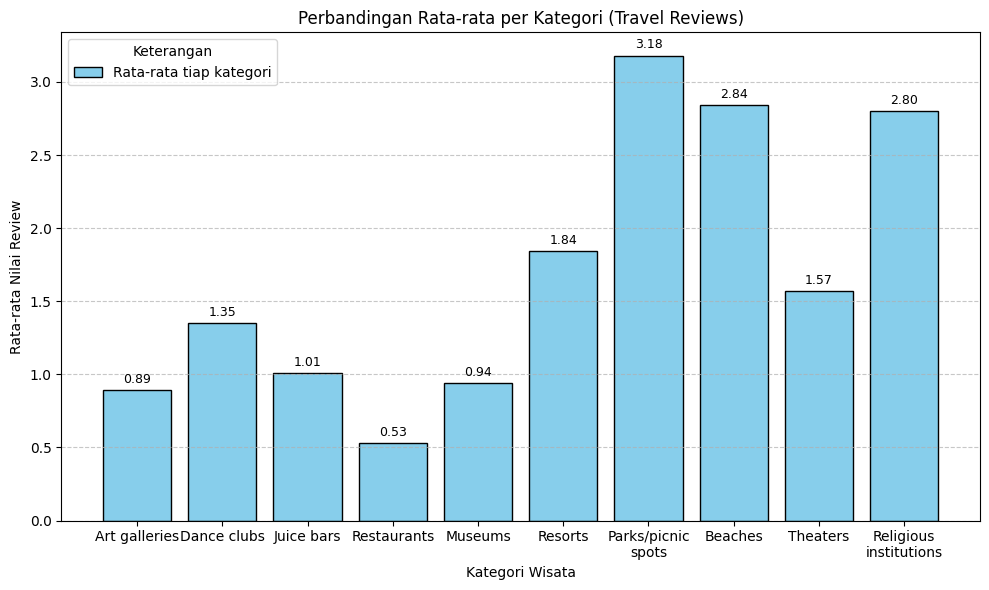

In [12]:
import matplotlib.pyplot as plt
import textwrap

# Hitung rata-rata per kategori
mean_values = df_plot.mean().round(2)

# Bungkus label biar gak kepanjangan
wrapped_labels = [textwrap.fill(lbl, width=16) for lbl in mean_values.index]

# Buat bar chart
plt.figure(figsize=(10, 6))
plt.bar(wrapped_labels, mean_values.values, color='skyblue', edgecolor='black', label='Rata-rata tiap kategori')

# Tambahkan legend (keterangan)
plt.legend(title="Keterangan", loc='upper left')

# Tambahkan label dan judul
plt.title("Perbandingan Rata-rata per Kategori (Travel Reviews)")
plt.xlabel("Kategori Wisata")
plt.ylabel("Rata-rata Nilai Review")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan nilai di atas batang
for i, val in enumerate(mean_values.values):
    plt.text(i, val + 0.05, f"{val:.2f}", ha='center', fontsize=9)

plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'nama_gambarX.png'))

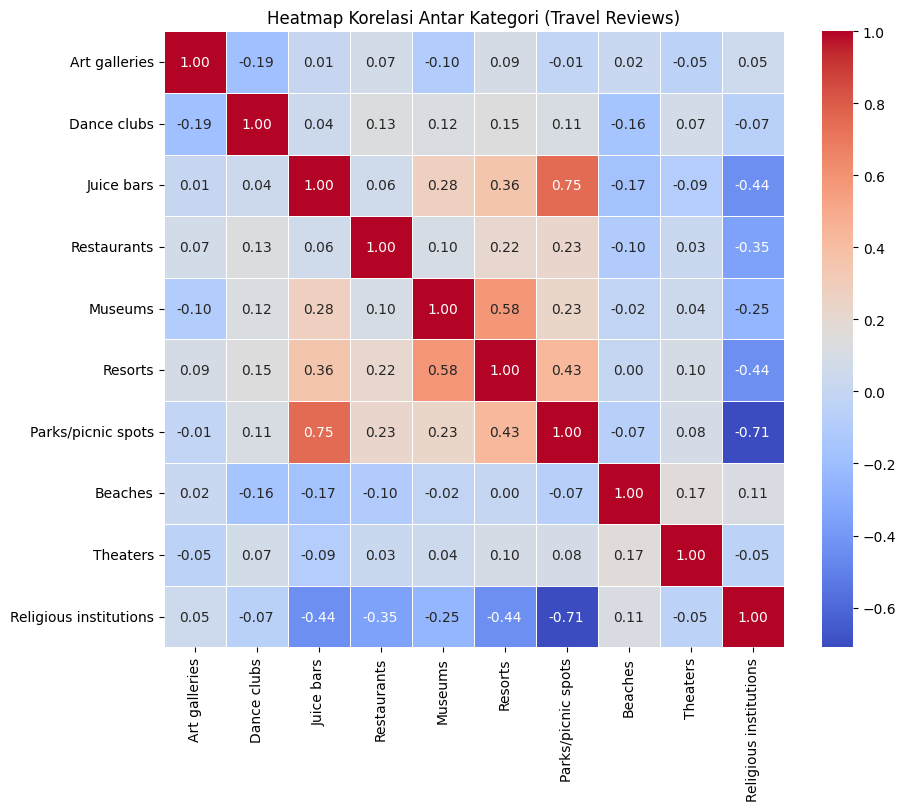

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
corr = df_plot.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap Korelasi Antar Kategori (Travel Reviews)")
plt.show()

#Nilai korelasi ditulis di dalam kotak (rentang -1 sampai +1):
#🔴 Mendekati +1 → hubungan positif kuat (jika satu naik, yang lain juga naik).
#🔵 Mendekati -1 → hubungan negatif kuat (jika satu naik, yang lain turun).
#⚪ Dekat 0 → hampir tidak ada hubungan antar kategori.

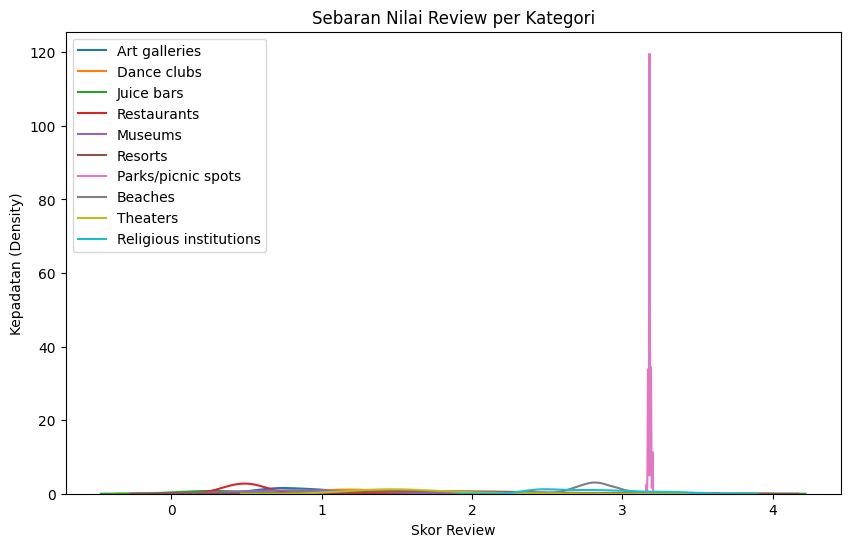

In [ ]:
plt.figure(figsize=(10,6))
for col in df_plot.columns:
    sns.kdeplot(df_plot[col], label=col)
plt.title("Sebaran Nilai Review per Kategori")
plt.xlabel("Skor Review")
plt.ylabel("Kepadatan (Density)")
plt.legend()
plt.show()

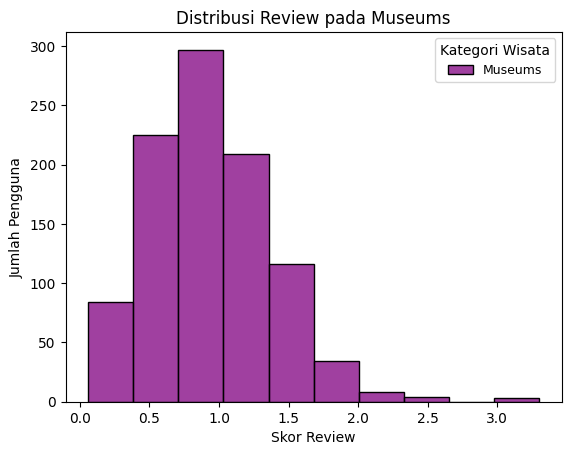

In [ ]:
sns.histplot(df_plot["Museums"], bins=10, color="purple", label="Museums")
plt.title("Distribusi Review pada Museums")
plt.xlabel("Skor Review")
plt.ylabel("Jumlah Pengguna")
plt.legend(title="Kategori Wisata", loc="upper right", fontsize=9, title_fontsize=10)

plt.show()


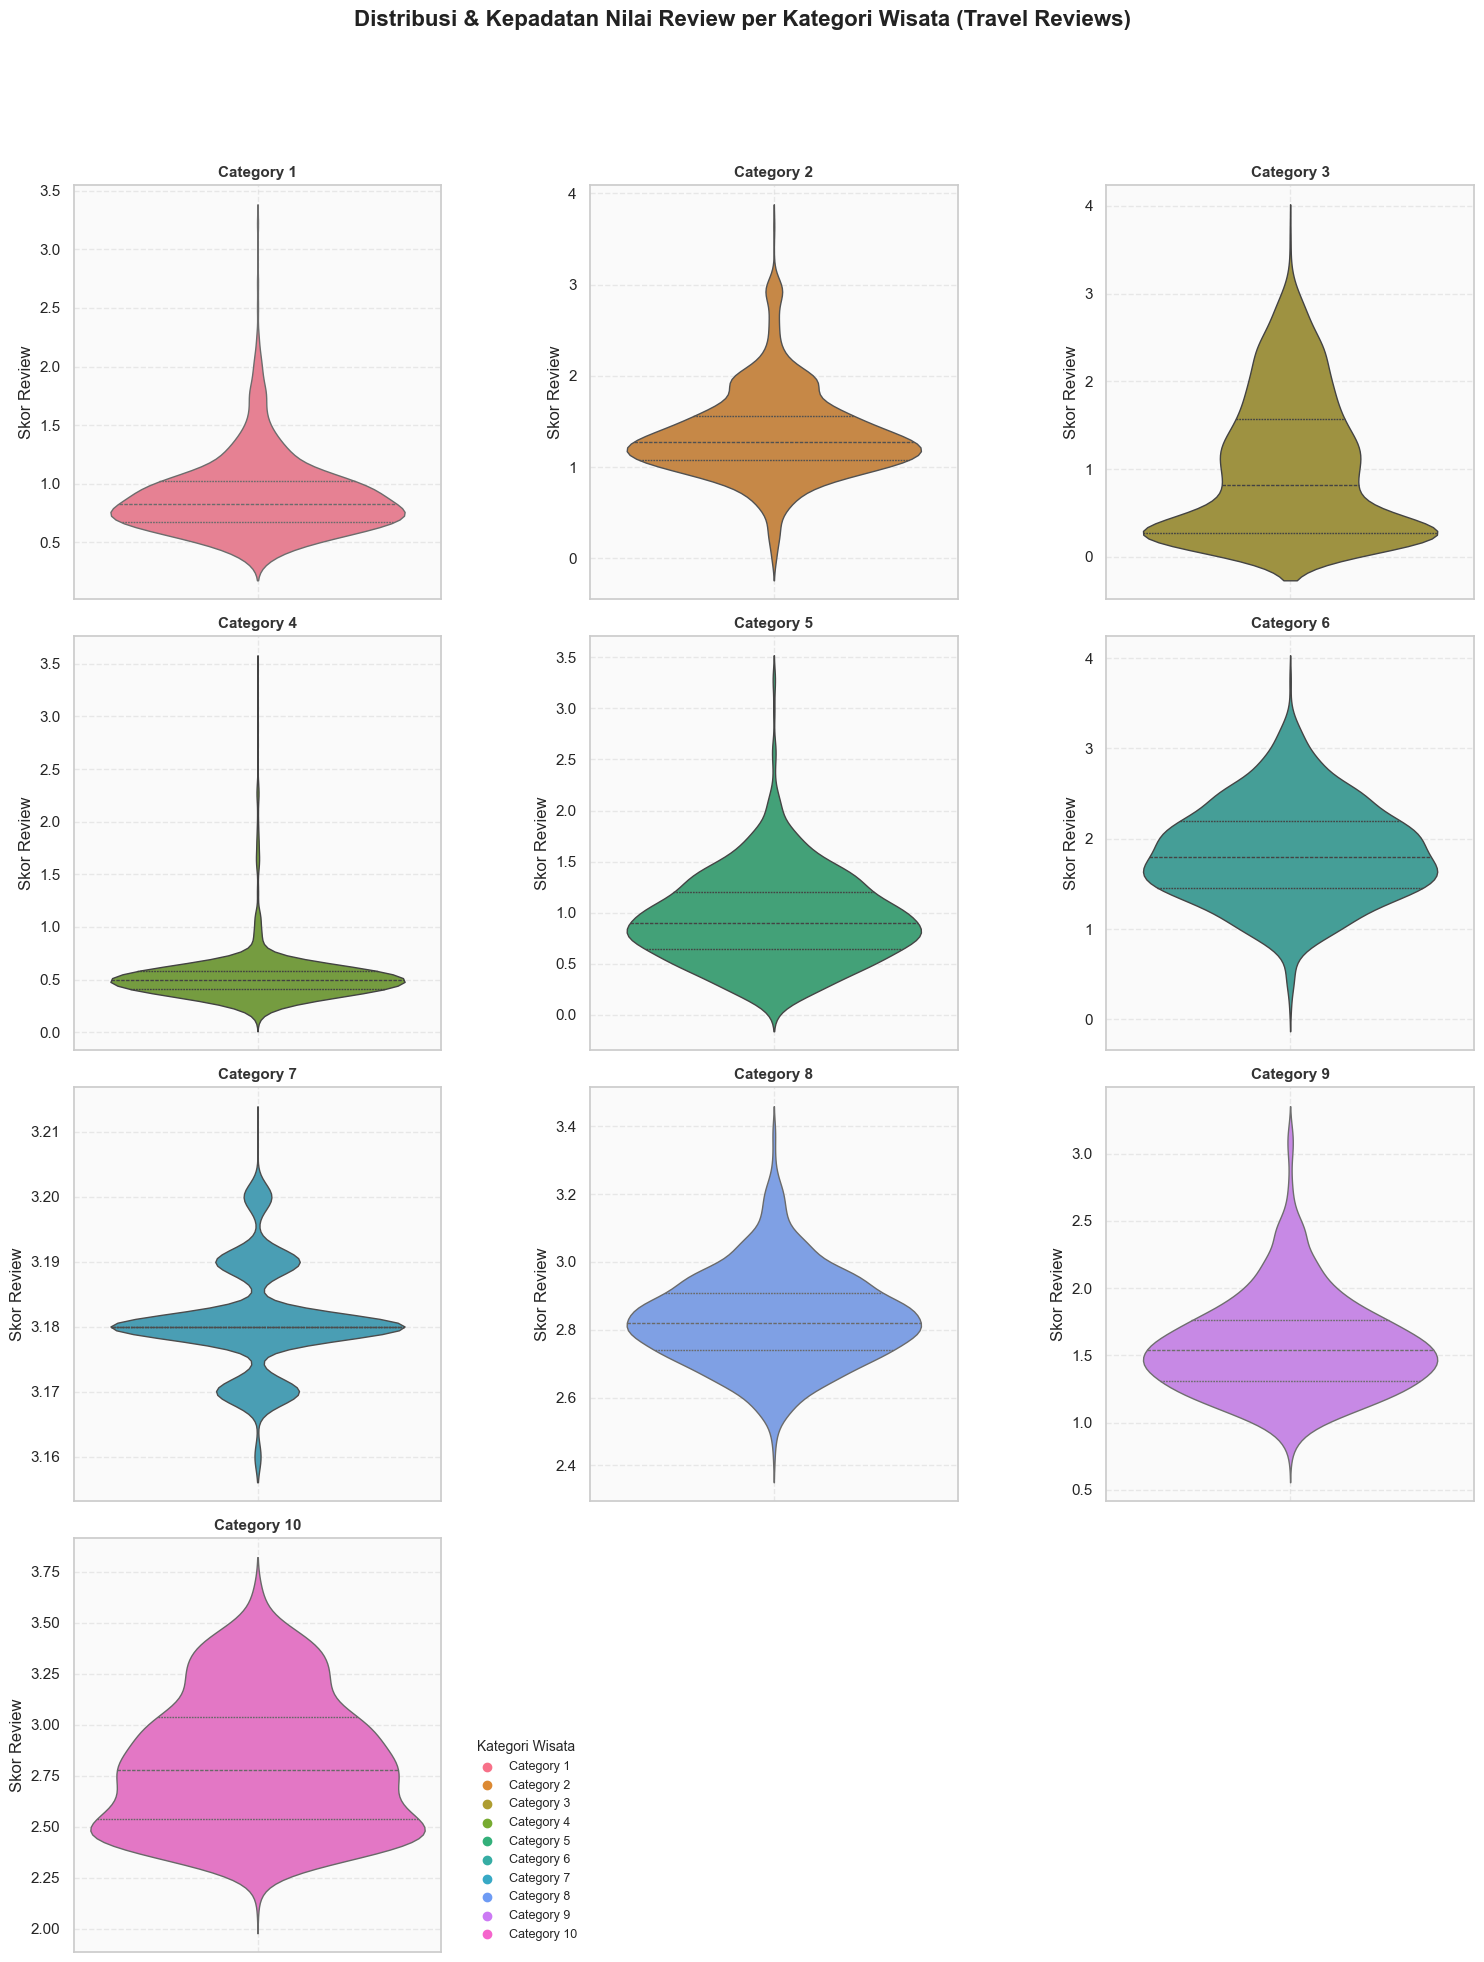

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap
import pandas as pd

# --- Dataset contoh (ganti df dengan dataset kamu) ---
df_plot = df.copy().apply(pd.to_numeric, errors='coerce').fillna(0)

# --- Bungkus label kategori agar rapi ---
wrapped_labels = [textwrap.fill(lbl, width=14) for lbl in df_plot.columns]

# --- Setup grid ---
sns.set(style="whitegrid")
n_cols = 3
n_rows = -(-len(df_plot.columns) // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# --- Palet warna otomatis (unik untuk tiap kategori) ---
palette = sns.color_palette("husl", len(df_plot.columns))

# --- Plot tiap kategori ---
for i, col in enumerate(df_plot.columns):
    ax = axes[i]
    if df_plot[col].nunique() > 1:
        sns.violinplot(
            y=df_plot[col],
            ax=ax,
            color=palette[i],
            inner="quartile",
            linewidth=1
        )
    else:
        ax.text(0.5, 0.5, "Data konstan/\nkosong", ha="center", va="center", fontsize=10, color="gray")
        ax.set_ylim(0, 1)

    ax.set_title(wrapped_labels[i], fontsize=11, fontweight='bold', color="#333")
    ax.set_xlabel('')
    ax.set_ylabel('Skor Review')
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.set_facecolor("#fafafa")

# --- Hapus subplot kosong jika grid tidak penuh ---
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# --- Tambahkan legend global di bawah judul ---
for i, label in enumerate(wrapped_labels):
    plt.scatter([], [], color=palette[i], label=label)

plt.legend(
    title="Kategori Wisata",
    loc='lower right',
    bbox_to_anchor=(1.40, 0),  # geser lebih ke kanan
    frameon=False,
    fontsize=9,
    title_fontsize=10
)




# --- Tambahkan judul utama ---
plt.suptitle(
    "Distribusi & Kepadatan Nilai Review per Kategori Wisata (Travel Reviews)",
    fontsize=16,
    fontweight='bold',
    color="#222",
    y=0.98
)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


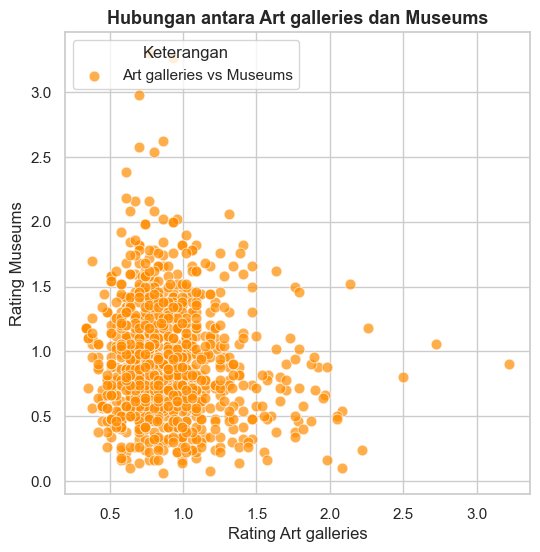

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(
    x=df_plot["Category 1"],  # Art galleries
    y=df_plot["Category 5"],  # Museums
    color='darkorange',
    alpha=0.7,
    s=60,
    label="Art galleries vs Museums"
)
plt.title("Hubungan antara Art galleries dan Museums", fontsize=13, fontweight='bold')
plt.xlabel("Rating Art galleries")
plt.ylabel("Rating Museums")
plt.legend(title="Keterangan", loc='upper left')
plt.grid(True)
plt.show()


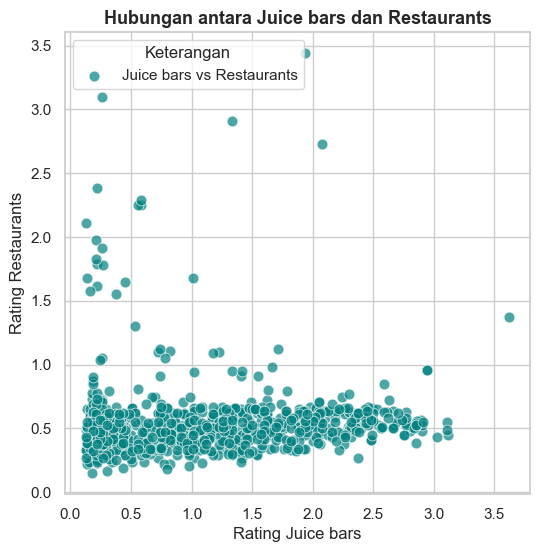

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(
    x=df_plot["Category 3"],  # Juice bars
    y=df_plot["Category 4"],  # Restaurants
    color='teal',
    alpha=0.7,
    s=60,
    label="Juice bars vs Restaurants"
)
plt.title("Hubungan antara Juice bars dan Restaurants", fontsize=13, fontweight='bold')
plt.xlabel("Rating Juice bars")
plt.ylabel("Rating Restaurants")
plt.legend(title="Keterangan", loc='upper left')
plt.grid(True)
plt.show()


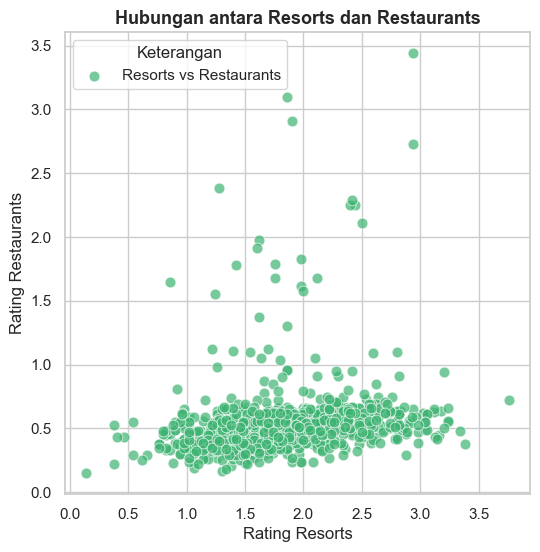

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(
    x=df_plot["Category 6"],  # Resorts
    y=df_plot["Category 4"],  # Restaurants
    color='mediumseagreen',
    alpha=0.7,
    s=60,
    label="Resorts vs Restaurants"
)
plt.title("Hubungan antara Resorts dan Restaurants", fontsize=13, fontweight='bold')
plt.xlabel("Rating Resorts")
plt.ylabel("Rating Restaurants")
plt.legend(title="Keterangan", loc='upper left')
plt.grid(True)
plt.show()


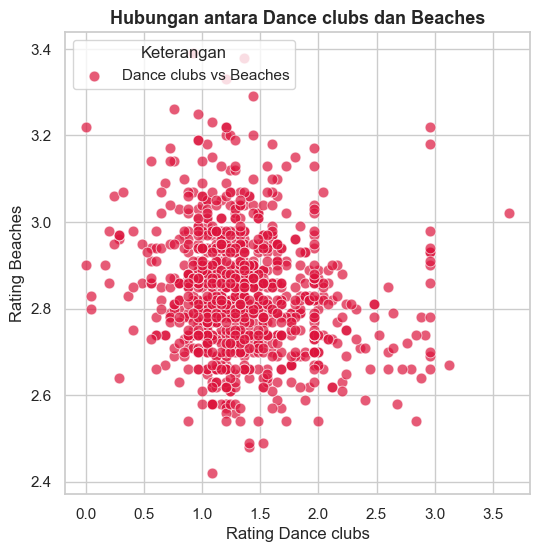

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(
    x=df_plot["Category 2"],  # Dance clubs
    y=df_plot["Category 8"],  # Beaches
    color='crimson',
    alpha=0.7,
    s=60,
    label="Dance clubs vs Beaches"
)
plt.title("Hubungan antara Dance clubs dan Beaches", fontsize=13, fontweight='bold')
plt.xlabel("Rating Dance clubs")
plt.ylabel("Rating Beaches")
plt.legend(title="Keterangan", loc='upper left')
plt.grid(True)
plt.show()
